<a href="https://colab.research.google.com/github/TillVollmer5/mass_spectroscopy/blob/main/Quantitative_analysis_Tracefinder_Output.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [30]:
Auto_1_pm_df = pd.read_csv('/content/drive/My Drive/Qualitative_Tracefinder_Data/Car_samples_27_11_2023_Auto1_PF_120k_125.csv')
Auto_1_pg_df = pd.read_csv('/content/drive/My Drive/Qualitative_Tracefinder_Data/Car_samples_27_11_2023_Auto1_PUF_hc_120k_138.csv')
Auto_2_gp_df = pd.read_csv('/content/drive/My Drive/Qualitative_Tracefinder_Data/Car_samples_27_11_2023_Auto2_PF_120k_147.csv')
Auto_2_pm_df = pd.read_csv('/content/drive/My Drive/Qualitative_Tracefinder_Data/Car_samples_27_11_2023_Auto2_PUF_120k_149.csv')
Auto_3_gp_df = pd.read_csv('/content/drive/My Drive/Qualitative_Tracefinder_Data/Car_samples_27_11_2023_Auto3_PUF_120k_165.csv')

In [41]:
Auto_1_pm_df['Ion Type'] = 'pm'
Auto_1_pg_df['Ion Type'] = 'pg'
Auto_2_gp_df['Ion Type'] = 'gp'
Auto_2_pm_df['Ion Type'] = 'pm'
Auto_3_gp_df['Ion Type'] = 'gp'

Auto_1_pm_df['Sample Name'] = 'Auto_1'
Auto_1_pg_df['Sample Name'] = 'Auto_1'
Auto_2_gp_df['Sample Name'] = 'Auto_2'
Auto_2_pm_df['Sample Name'] = 'Auto_2'
Auto_3_gp_df['Sample Name'] = 'Auto_3'

dfs = [Auto_1_pm_df, Auto_1_pg_df, Auto_2_gp_df, Auto_2_pm_df, Auto_3_gp_df]
df = pd.concat(dfs, ignore_index=True)

df = df.sort_values(by='Retention Time')

In [31]:
print(Auto_1_pm_df)

                  Peak ID         M/Z  Retention Time          Area  \
0      peak @ 4.69 191.00  191.001022            4.66  2.604166e+07   
1      peak @ 4.69 191.00  191.001022            4.66  2.604166e+07   
2      peak @ 4.69 191.00  191.001022            4.66  2.604166e+07   
3      peak @ 4.76 225.04  225.042923            4.76  0.000000e+00   
4      peak @ 4.76 225.04  225.042923            4.76  0.000000e+00   
...                   ...         ...             ...           ...   
4458  peak @ 33.96 141.07  141.069962           33.96  0.000000e+00   
4459   peak @ 34.08 67.05   67.054276           34.08  0.000000e+00   
4460   peak @ 34.12 95.09   95.085587           34.12  0.000000e+00   
4461  peak @ 34.17 129.02  129.018265           34.17  0.000000e+00   
4462  peak @ 34.30 109.10  109.101265           34.30  0.000000e+00   

            Height  Potential ID      Mass  Mono Isotopic Mass  Charge State  \
0     1.712706e+06             3  190.1586          189.993744     

                                  Peak ID         M/Z  Retention Time  \
Retention Time                                                          
4.80           6        peak @ 4.80 45.03   45.033527            4.80   
4.82           8935     peak @ 4.84 45.03   45.033501            4.82   
5.00           13403   peak @ 5.02 120.09  120.093430            5.00   
5.05           17868    peak @ 5.07 98.07   98.072678            5.05   
5.06           4479     peak @ 5.07 98.07   98.072693            5.06   
...                                   ...         ...             ...   
33.61          22158  peak @ 34.17 129.02  129.018265           33.61   
33.80          4454   peak @ 34.14 167.09  167.085541           33.80   
33.99          17850  peak @ 33.99 167.09  167.085556           33.99   
34.21          13385  peak @ 33.88 167.09  167.085571           34.21   
34.77          22313   peak @ 33.87 43.05   43.054146           34.77   

                              Area        Height  

<ipython-input-34-fa54d1e0b32f>:33: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Retention Time', y='Mono Isotopic Mass', data=df_filtered, palette='viridis')


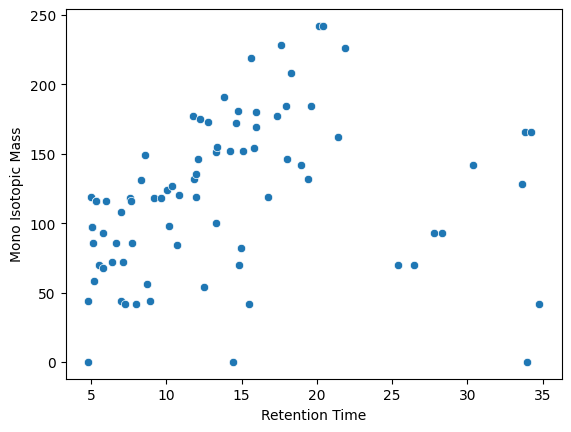

In [34]:
# Old filter, does not differentiate between gm andpm
def filter_peaks(group, time_diff_threshold=0.000000001):
    if len(group) > 1:
        group = group.sort_values(by='ID Source Detail', ascending=False)
        group = group.sort_values(by='Retention Time')

        time_diff = group['Retention Time'].diff()

        group = group.loc[time_diff > time_diff_threshold]

        group = group.drop_duplicates(subset='Retention Time', keep='first', inplace=False)
    return group

df_filtered = df.groupby('Retention Time').apply(filter_peaks)

df_filtered = df_filtered.dropna(subset=['ID Source Detail'])

print(df_filtered)

sns.scatterplot(x='Retention Time', y='Mono Isotopic Mass', data=df_filtered, palette='viridis')
plt.show()

Plot(RT,m/z) with filtered data and separation into options phase but not car sample

n(gp)= 200
n(pm)= 144


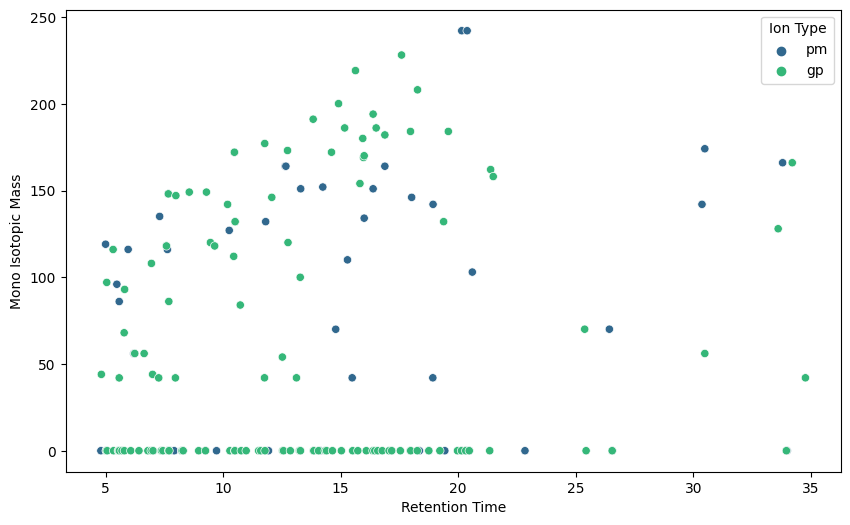

In [44]:
def filter_peaks(group, time_diff_threshold=0.20):
    if len(group) > 1:
        group = group.sort_values(by='ID Source Detail', ascending=False)
        group = group.sort_values(by='Retention Time')

        pm_group = group[group['Ion Type'] == 'pm']
        gp_group = group[group['Ion Type'] == 'gp']

        if not pm_group.empty:
            pm_time_diff = pm_group['Retention Time'].diff()
            pm_group = pm_group.loc[pm_time_diff > time_diff_threshold]
            pm_group = pm_group.drop_duplicates(subset='Retention Time', keep='first', inplace=False)

        if not gp_group.empty:
            gp_time_diff = gp_group['Retention Time'].diff()
            gp_group = gp_group.loc[gp_time_diff > time_diff_threshold]
            gp_group = gp_group.drop_duplicates(subset='Retention Time', keep='first', inplace=False)

        group = pd.concat([pm_group, gp_group], ignore_index=True)

    return group

df_filtered_pm = df[df['Ion Type'] == 'pm'].groupby('Retention Time').apply(filter_peaks)
df_filtered_gp = df[df['Ion Type'] == 'gp'].groupby('Retention Time').apply(filter_peaks)

df_filtered = pd.concat([df_filtered_pm, df_filtered_gp], ignore_index=True)

df_filtered = df_filtered.dropna(subset=['ID Source Detail'])

print('n(gp)=', len(df_filtered_gp['Retention Time']))
print('n(pm)=', len(df_filtered_pm['Retention Time']))

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Retention Time', y='Mono Isotopic Mass', hue='Ion Type', data=df_filtered, palette='viridis')
plt.show()

Plot(RT,m/z) with filtered data and separation into options Car sample and phase

n(gp)= 200
n(pm)= 144


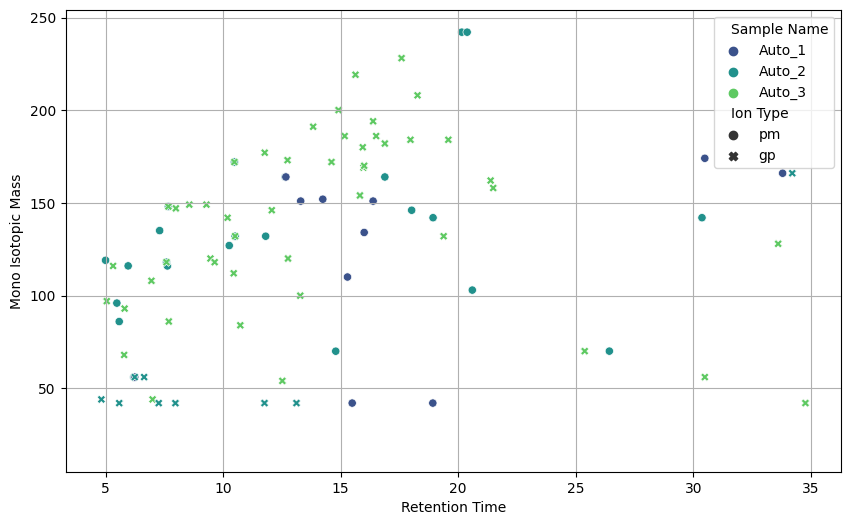

In [43]:
def filter_peaks(group, time_diff_threshold=0.20):
    if len(group) > 1:
        group = group.sort_values(by='ID Source Detail', ascending=False)
        group = group.sort_values(by='Retention Time')

        pm_group = group[group['Ion Type'] == 'pm']
        gp_group = group[group['Ion Type'] == 'gp']

        if not pm_group.empty:

            pm_time_diff = pm_group['Retention Time'].diff()
            pm_group = pm_group.loc[pm_time_diff > time_diff_threshold]
            pm_group = pm_group.drop_duplicates(subset='Retention Time', keep='first', inplace=False)

        if not gp_group.empty:

            gp_time_diff = gp_group['Retention Time'].diff()
            gp_group = gp_group.loc[gp_time_diff > time_diff_threshold]
            gp_group = gp_group.drop_duplicates(subset='Retention Time', keep='first', inplace=False)

        group = pd.concat([pm_group, gp_group], ignore_index=True)

    return group

df_filtered_pm = df[df['Ion Type'] == 'pm'].groupby('Retention Time').apply(filter_peaks)
df_filtered_gp = df[df['Ion Type'] == 'gp'].groupby('Retention Time').apply(filter_peaks)

df_filtered = pd.concat([df_filtered_pm, df_filtered_gp], ignore_index=True)

df_filtered = df_filtered.dropna(subset=['ID Source Detail'])

print('n(gp)=', len(df_filtered_gp['Retention Time']))
print('n(pm)=', len(df_filtered_pm['Retention Time']))

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Retention Time', y='Mono Isotopic Mass', hue='Sample Name', style='Ion Type', data=df_filtered, palette='viridis')
plt.ylim(5)
plt.grid(True)
plt.show()

Plot(RT,m/z) filtered data, no differentiation PM or GP

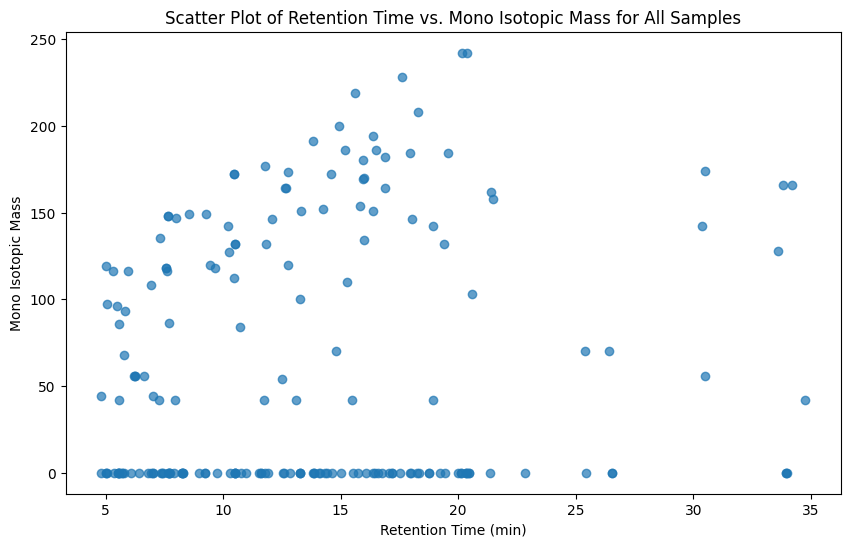

In [33]:
color_mapping = {
    'Auto_1_PM': 'red',
    'Auto_1_PG': 'blue',
    'Auto_2_GP': 'green',
    'Auto_2_PM': 'purple',
    'Auto_3_GP': 'orange'
}

plt.figure(figsize=(10, 6))

plt.scatter(df_filtered['Retention Time'], df_filtered['Mono Isotopic Mass'], alpha=0.7)

plt.xlabel('Retention Time (min)')
plt.ylabel('Mono Isotopic Mass')
plt.title('Scatter Plot of Retention Time vs. Mono Isotopic Mass for All Samples')
plt.show()

Plot(RT,m/z), not with filtered data

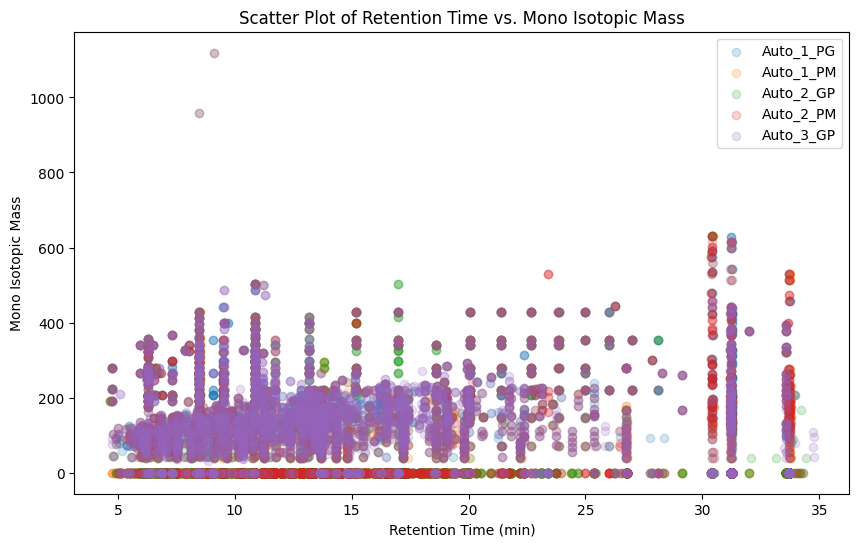

In [ ]:
Auto_1_pm_df['Sample'] = 'Auto_1_PM'
Auto_1_pg_df['Sample'] = 'Auto_1_PG'
Auto_2_gp_df['Sample'] = 'Auto_2_GP'
Auto_2_pm_df['Sample'] = 'Auto_2_PM'
Auto_3_gp_df['Sample'] = 'Auto_3_GP'

dfs = [Auto_1_pm_df, Auto_1_pg_df, Auto_2_gp_df, Auto_2_pm_df, Auto_3_gp_df]
df = pd.concat(dfs, ignore_index=True)

df = df.sort_values(by='Retention Time')

# Create a scatter plot with color differentiation
plt.figure(figsize=(10, 6))

for sample, group in df.groupby('Sample'):
    plt.scatter(group['Retention Time'], group['Mono Isotopic Mass'], label=sample, alpha=0.2)

plt.xlabel('Retention Time (min)')
plt.ylabel('Mono Isotopic Mass')
plt.title('Scatter Plot of Retention Time vs. Mono Isotopic Mass')
plt.legend()
plt.show()

KeyboardInterrupt: ignored

Error in callback <function _draw_all_if_interactive at 0x78e9ed6e6050> (for post_execute):


KeyboardInterrupt: ignored

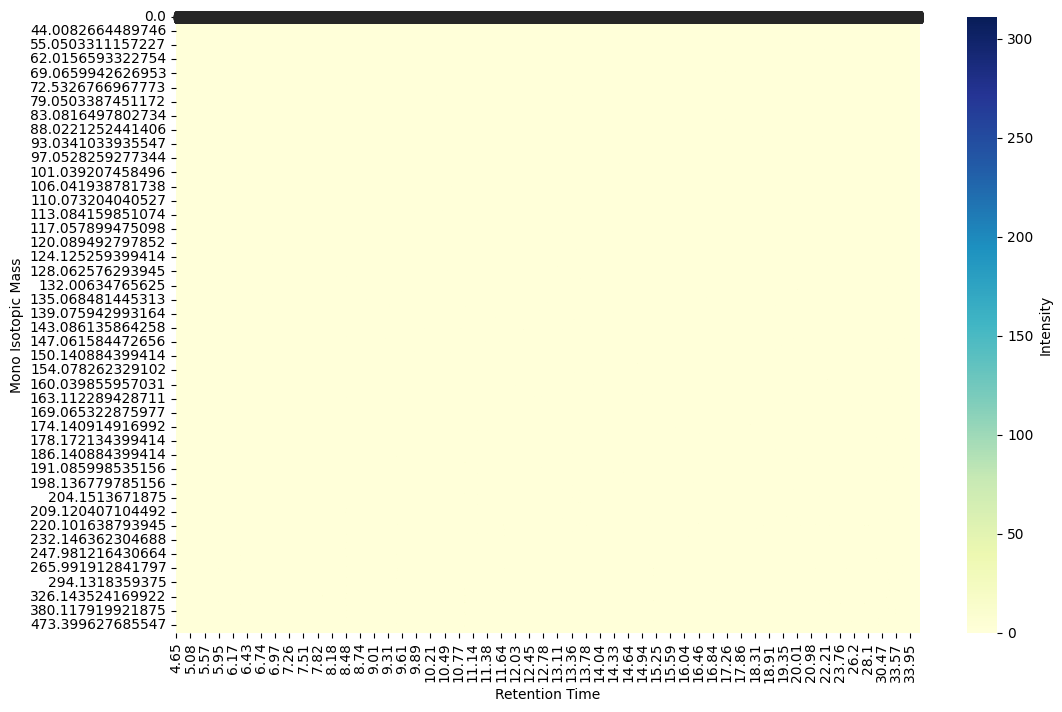

In [ ]:
fs = [Auto_1_pm_df, Auto_1_pg_df, Auto_2_gp_df, Auto_2_pm_df, Auto_3_gp_df]
df = pd.concat(dfs, ignore_index=True)

# Sort the DataFrame by retention time
df = df.sort_values(by='Retention Time')

# Create a heatmap
heatmap_data = df.pivot_table(index='Mono Isotopic Mass', columns='Retention Time', values='Sample', aggfunc='count', fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt="d", cbar_kws={'label': 'Intensity'})
plt.title('Heatmap of Intensity by Mass and Retention Time')
plt.xlabel('Retention Time (min)')
plt.ylabel('Mono Isotopic Mass')
plt.show()

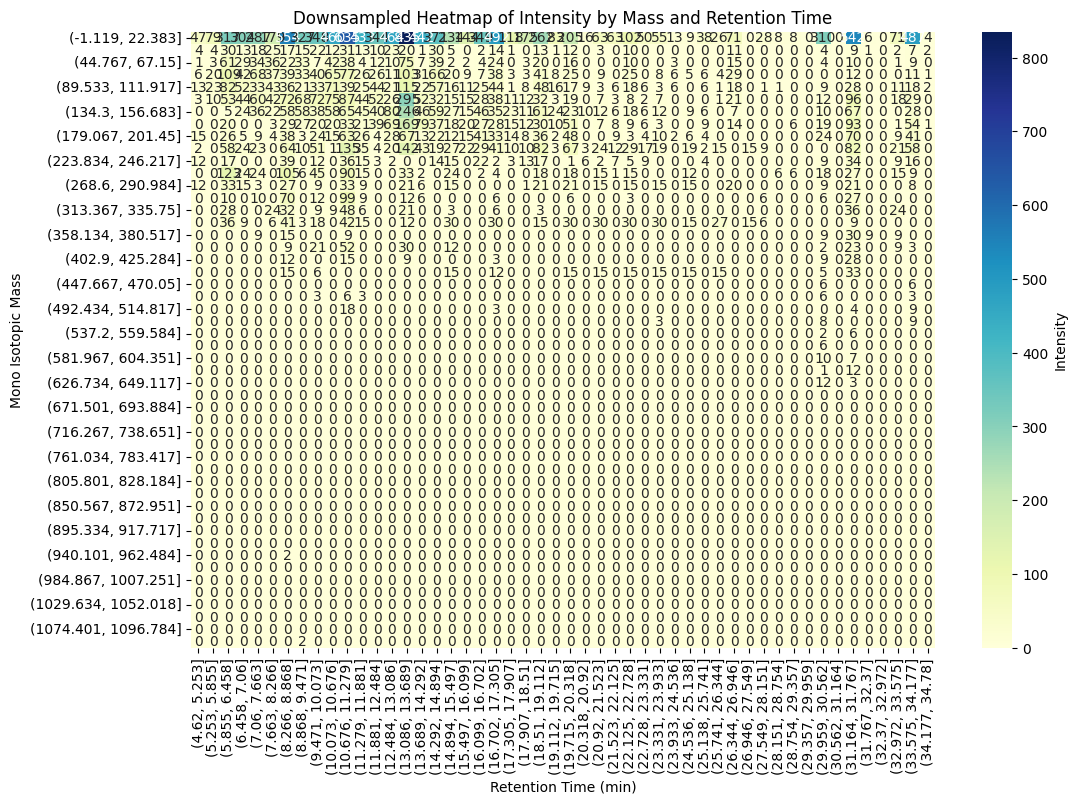

In [ ]:
df = pd.concat(fs, ignore_index=True)

# Sort the DataFrame by retention time
df = df.sort_values(by='Retention Time')

# Set the number of bins for downsampling
num_bins_rt = 50  # Number of bins for retention time
num_bins_mass = 50  # Number of bins for mono isotopic mass

# Downsampling by grouping into bins
df['Retention Time Bin'] = pd.cut(df['Retention Time'], bins=num_bins_rt)
df['Mono Isotopic Mass Bin'] = pd.cut(df['Mono Isotopic Mass'], bins=num_bins_mass)

# Group by the bins and calculate the count for each group
heatmap_data = df.groupby(['Mono Isotopic Mass Bin', 'Retention Time Bin']).size().unstack(fill_value=0)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt="d", cbar_kws={'label': 'Intensity'})
plt.title('Downsampled Heatmap of Intensity by Mass and Retention Time')
plt.xlabel('Retention Time (min)')
plt.ylabel('Mono Isotopic Mass')
plt.show()

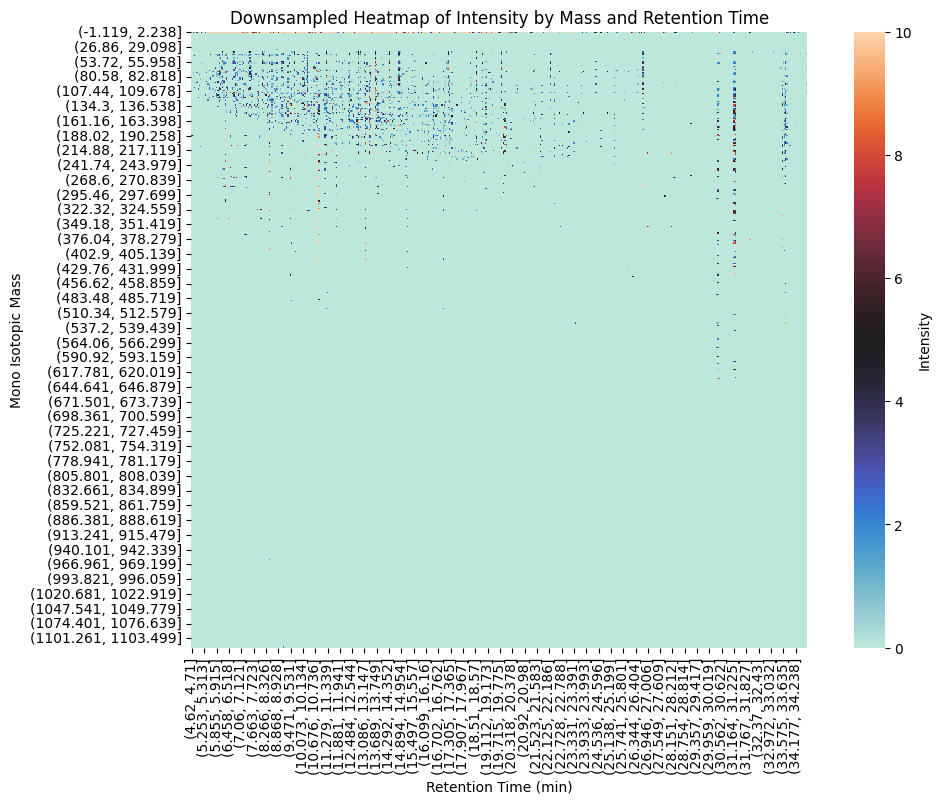

In [ ]:
# Assuming fs contains your individual DataFrames
df = pd.concat(fs, ignore_index=True)

# Sort the DataFrame by retention time
df = df.sort_values(by='Retention Time')

# Set the number of bins for downsampling
num_bins_rt = 500  # Number of bins for retention time
num_bins_mass = 500  # Number of bins for mono isotopic mass

# Downsampling by grouping into bins
df['Retention Time Bin'] = pd.cut(df['Retention Time'], bins=num_bins_rt)
df['Mono Isotopic Mass Bin'] = pd.cut(df['Mono Isotopic Mass'], bins=num_bins_mass)

# Group by the bins and calculate the count for each group
heatmap_data = df.groupby(['Mono Isotopic Mass Bin', 'Retention Time Bin']).size().unstack(fill_value=0)

vmin = 0  # Minimum intensity value
vmax = 10  # Maximum intensity value

# Create a heatmap with the adjusted intensity scale
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="icefire", annot=False, square=True, cbar_kws={'label': 'Intensity'}, vmin=vmin, vmax=vmax)

plt.title('Downsampled Heatmap of Intensity by Mass and Retention Time')
plt.xlabel('Retention Time (min)')
plt.ylabel('Mono Isotopic Mass')
plt.show()

In [ ]:
from matplotlib import colormaps
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viridis_r',
 'cividis_r',
 'twilight_r',
 'twilight

KeyError: ignored

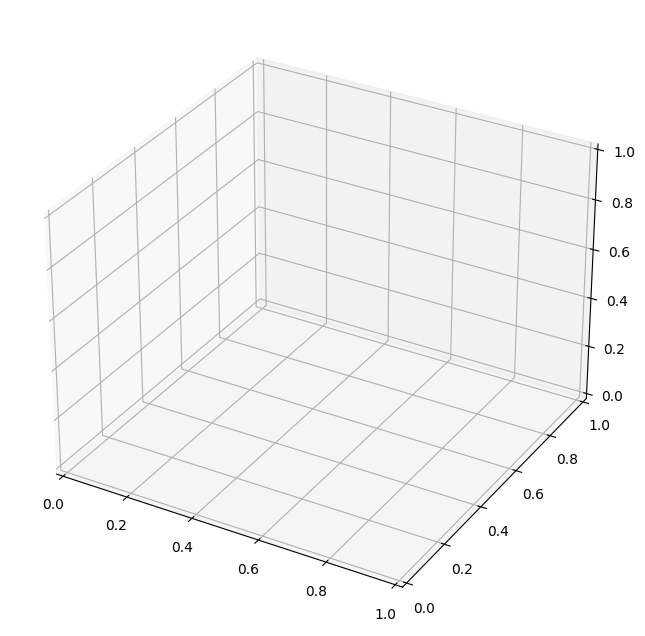

In [46]:
s = [Auto_1_pm_df, Auto_1_pg_df, Auto_2_gp_df, Auto_2_pm_df, Auto_3_gp_df]
df = pd.concat(dfs, ignore_index=True)

#
df = df.sort_values(by='Retention Time')
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

for sample, group in df.groupby('Sample'):
    ax.scatter(group['Retention Time'], group['Mono Isotopic Mass'], zs=group['Area'], label=sample, alpha=0.2)

ax.set_xlabel('Retention Time (min)')
ax.set_ylabel('Mono Isotopic Mass')
ax.set_zlabel('Intensity')
ax.set_title('3D Scatter Plot of Retention Time, Mono Isotopic Mass, and Intensity')
ax.legend()
y_min = 0  # Set your desired minimum value
y_max = 700  # Set your desired maximum value
ax.set_ylim(y_min, y_max)
plt.show()

KeyError: ignored

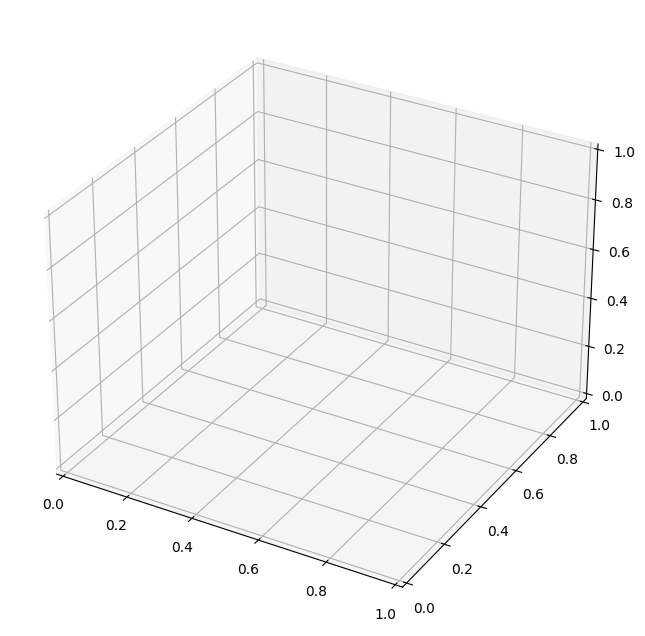

In [47]:
# Combine your DataFrames into one if needed
dfs = [Auto_1_pm_df, Auto_1_pg_df, Auto_2_gp_df, Auto_2_pm_df, Auto_3_gp_df]
df = pd.concat(dfs, ignore_index=True)

# Sort the DataFrame by retention time
df = df.sort_values(by='Retention Time')

# Apply log10 to the z-axis (Intensity)
df['Log Area'] = np.log10(df['Area'] + 1)  # Adding 1 to avoid log(0)

# Create a 3D scatter plot with log10 scale on the z-axis
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

for sample, group in df.groupby('Sample'):
    ax.scatter(group['Retention Time'], group['Mono Isotopic Mass'], zs=group['Log Area'], label=sample, alpha=0.2)

ax.set_xlabel('Retention Time (min)')
ax.set_ylabel('Mono Isotopic Mass')
ax.set_zlabel('Log Intensity')
ax.set_title('3D Scatter Plot of Retention Time, Mono Isotopic Mass, and Log Intensity')
ax.legend()
z_min = 5  # Set your desired minimum value
z_max = 10  # Set your desired maximum value
ax.set_zlim(z_min, z_max)
y_min = 0  # Set your desired minimum value
y_max = 600  # Set your desired maximum value
ax.set_ylim(y_min, y_max)
ax.grid(True)
plt.show()